今天我们介绍下图像平滑的相关操作：

我们需要介绍一下两个典型的噪声类型：

椒盐噪声：椒盐噪声又称脉冲噪声，是随机出现的黑点或者白点

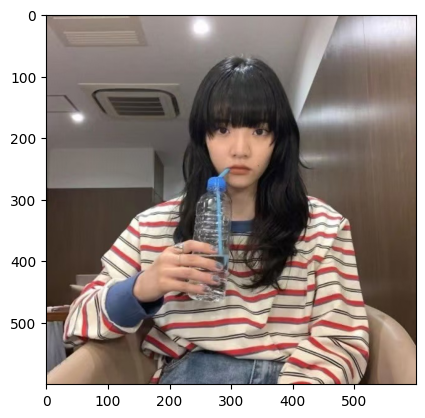

In [299]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread('D:\image\\aimyon.jpg')
plt.imshow(img[:,:,::-1])


现在我们演示下椒盐噪声影响后的图像：

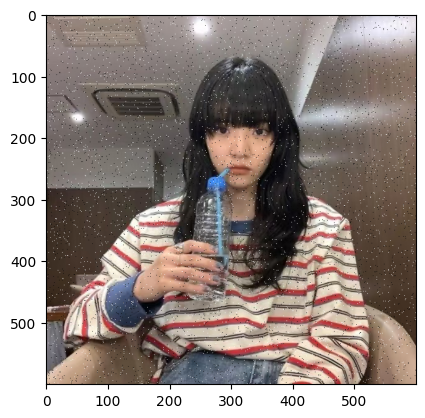

In [300]:
def add_sp_noise(img,prob=0.02):
    h,w=img.shape[:2]
    noise=np.random.choice([0,1,2],size=(h,w),p=[prob/2,prob/2,1-prob])
    img_noise=img.copy()
    img_noise[noise==0]=0
    img_noise[noise==1]=255
    return img_noise
img_noise=add_sp_noise(img)
plt.imshow(img_noise[:,:,::-1])

接着我们介绍另一种噪声：

高斯噪声：指噪声密度函数服从高斯分布(正态分布)的一类噪声

下面演示下高斯噪声影响后的图像：

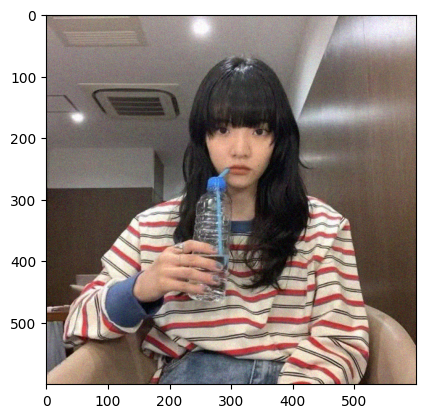

In [301]:
def add_gaussian_noise(img, mean=0, var=100): 
    img = img.astype(np.float32) / 255.0  
    noise_mean = mean / 255.0
    noise_std = np.sqrt(var) / 255.0
    noise = np.random.normal(noise_mean, noise_std, img.shape)
    img_noise = img + noise
    img_noise = np.clip(img_noise, 0, 1)
    return (img_noise * 255).astype(np.uint8)  
img_gaussian=add_gaussian_noise(img)
plt.imshow(img_gaussian[:,:,::-1])


接下来我们就开始介绍几种常见的图像平滑的操作：

均值滤波：

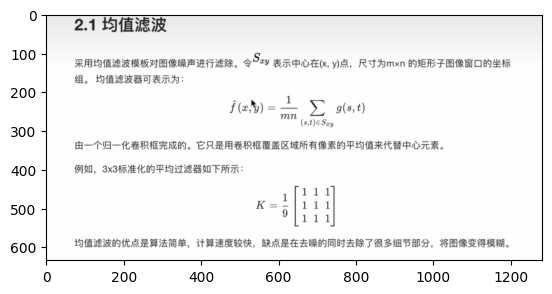

In [302]:
avf=cv.imread('D:\Code\Opencv\image_smoothing\\averageFiltering.png')
plt.imshow(avf[:,:,::-1])

我们分别用均值滤波来滤除上述介绍的两种噪声：<span style="color:blue;">blur(src,ksize,anchor,borderType)</span>

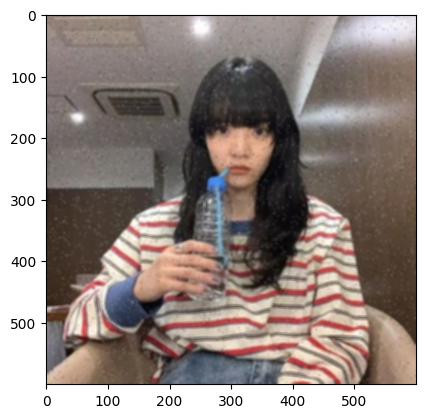

In [303]:
avfImg1=cv.blur(img_noise,(5,5))
plt.imshow(avfImg1[:,:,::-1])

显然对于椒盐噪声有明显的抑制作用，由于运算简单，所以运算速度很快。但是由于算法本身的原因，会导致原图像的细节模糊

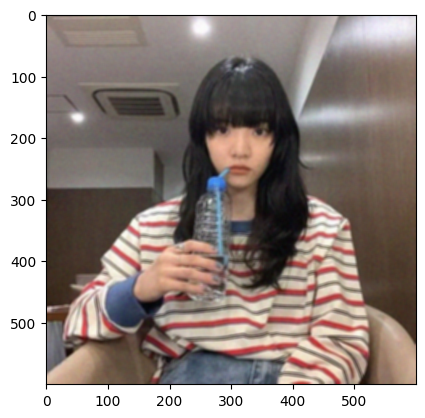

In [304]:
avfImg2=cv.blur(img_gaussian,(5,5))
plt.imshow(avfImg2[:,:,::-1])

对于高斯噪声(均值为0)也有抑制作用，最后介绍对于均值不为0的高斯噪声的情况

接下来介绍高斯滤波：

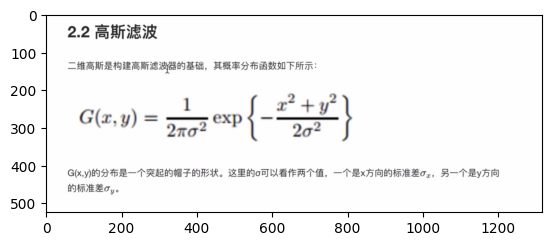

In [305]:
gsf=cv.imread('D:\Code\Opencv\image_smoothing\\gaussianFiltering.png')
plt.imshow(gsf[:,:,::-1])

下面介绍具体的高斯滤波的过程：我们先确定核的大小，进而确定核中心。接着根据其他像素点(x,y)距离核中心(0,0)的距离带入上述的二维高斯公式中求出核对应位置的核权重。以这个原则填充整个核，最后将原图像与核进行卷积，就得到了滤波后的图像

我们分别用高斯滤波来滤除上述的噪声图像：<span style="color:blue;">GaussianBlur(src,ksize,sigmax,sigmay,borderType)

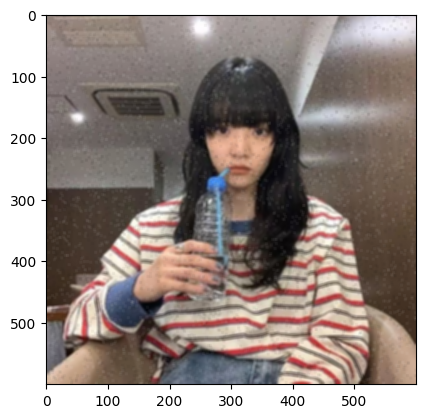

In [306]:
gsfImg1=cv.GaussianBlur(img_noise,(5,5),5)#当sigma参数为0时，相当于没滤波，只有核中心为一，其他为零。当趋近于无穷时，退化为均值核
plt.imshow(gsfImg1[:,:,::-1])

对于原图来说是有所缓解，但是噪声残留情况显然不如均值滤波。其实从核的选取就可以预测这个结果，因为高斯核的中心权重较高，周围权重较低，不能很好去除椒盐噪声。但是明显对于图像的细节模糊程度来说，高斯滤波比均值滤波的程度要低

(<Axes: >, <matplotlib.image.AxesImage at 0x1bd1d092680>)

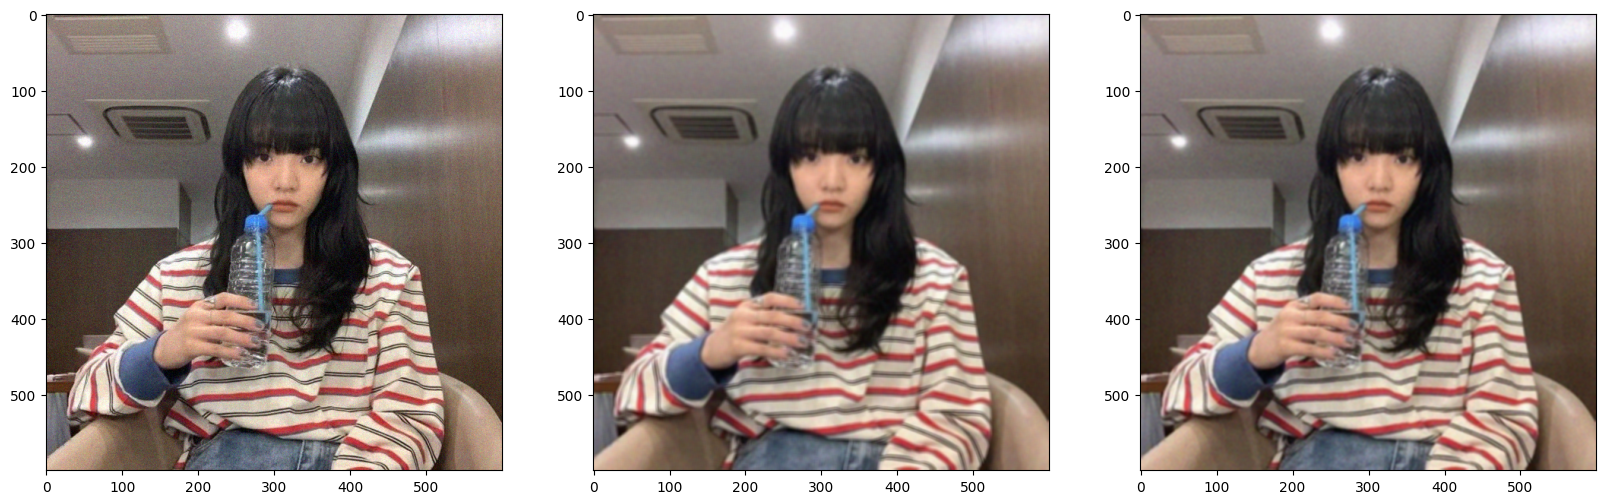

In [307]:
gsfImg2=cv.GaussianBlur(img_gaussian,(5,5),1.5)
plt.figure(figsize=(20,8),dpi=100)
plt.subplot(131),plt.imshow(img_gaussian[:,:,::-1])
plt.subplot(132),plt.imshow(avfImg2[:,:,::-1])
plt.subplot(133),plt.imshow(gsfImg2[:,:,::-1])

在理论来说，高斯滤波在去除高斯噪声的场景十分有效，比均值滤波更加有效,对图像的模糊更加小。但是对于椒盐噪声，明显滤波效果均值滤波好于高斯滤波，但是图像模糊更严重

中值滤波：

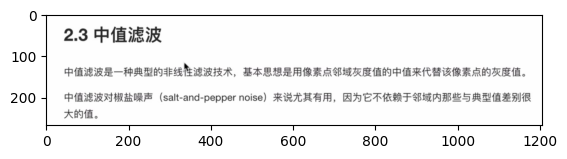

In [308]:
mdf=cv.imread('D:\Code\Opencv\image_smoothing\\medianFiltering.png')
plt.imshow(mdf[:,:,::-1])

这里只对椒盐噪声进行中值滤波：<span style="color:blue;">medianBlur(src,ksize)</span>

(<Axes: >, <matplotlib.image.AxesImage at 0x1bd21d68be0>)

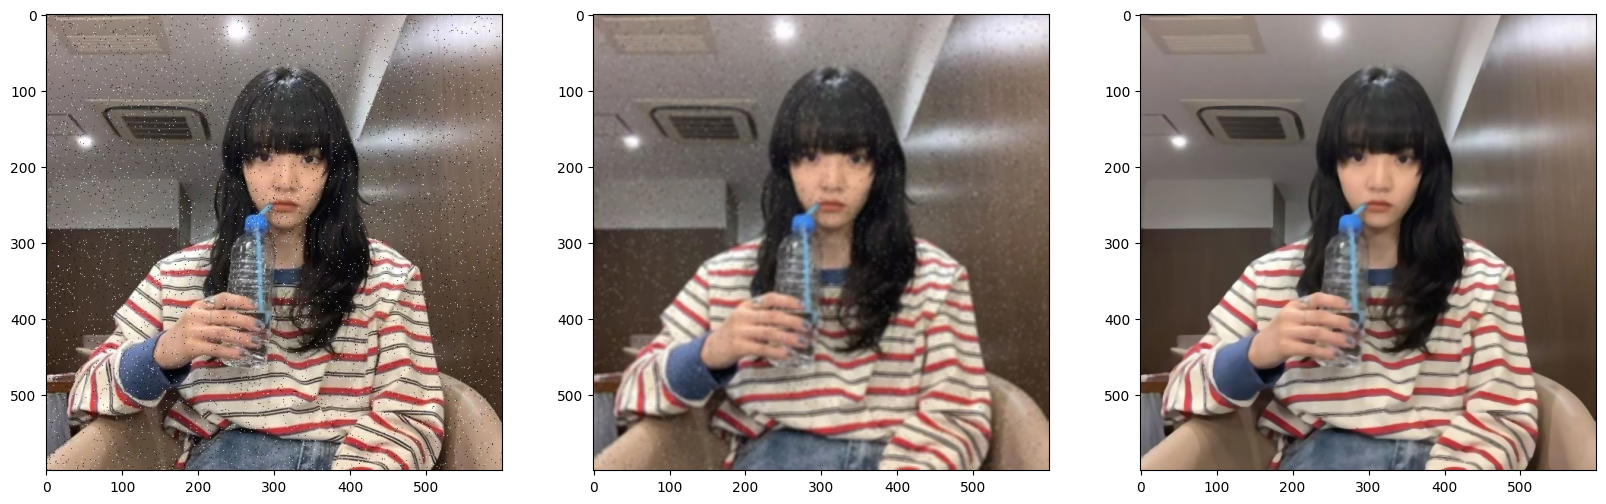

In [309]:
mdfImg=cv.medianBlur(img_noise,5)
plt.figure(figsize=(20,8),dpi=100)
plt.subplot(131),plt.imshow(img_noise[:,:,::-1])
plt.subplot(132),plt.imshow(avfImg1[:,:,::-1])
plt.subplot(133),plt.imshow(mdfImg[:,:,::-1])

效果很明显，中值滤波能有效去除极端值(椒盐噪声)的影响，对于高斯和均值滤波：

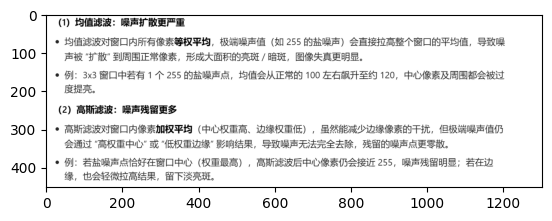

In [310]:
cmp=cv.imread('D:\Code\Opencv\image_smoothing\\result.png')
plt.imshow(cmp[:,:,::-1])

对于均值不为0的高斯噪声，高斯滤波也无能为力。因为他无法弥补均值给图像带来的整体亮度变化问题